<b>You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.</b>

In [1]:
from bs4 import BeautifulSoup
import urllib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

import warnings
from tqdm import tqdm

%matplotlib inline
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')


In [2]:
# Load the data

jobs1 = pd.read_csv('./jobs1.csv')
jobs2 = pd.read_csv('./jobs2.csv')
jobs3 = pd.read_csv('./jobs3.csv')
jobs4 = pd.read_csv('./jobs4.csv')
jobs5 = pd.read_csv('./jobs5.csv')


In [3]:
jobs5.shape

(800, 14)

In [4]:
jobs5.tail(10)

,Unnamed: 0,Applications,Categories,Company,EmployType,ExpiryDate,Location,PostedDate,Requirements,SalaryHigh,SalaryLow,SalaryRate,Seniority,Title
790,790,20.0,Manufacturing,OFFICE SECRETARIES PTE. LTD.,Permanent,Closing on 06 Feb 2019,North,Posted 07 Jan 2019,Requirements\r\nDegree in Accountancy or ACCA\...,"$4,500","$3,000",Monthly,Executive,Finance Executive
791,791,47.0,Admin / Secretarial,INFOCHOLA SOLUTIONS PTE. LTD.,Full Time,Closing on 06 Feb 2019,West,Posted 07 Jan 2019,At least 3 years experience in office administ...,"$2,500","$1,500",Monthly,Junior Executive,Office & Admin Executive
792,792,19.0,"Accounting / Auditing / Taxation, Banking and ...",OMNI MACHINERY PTE. LTD.,"Contract, Full Time, Flexi work",Closing on 06 Feb 2019,West,Posted 07 Jan 2019,Freshies are welcome but you must atleast unde...,"$2,500","$1,500",Monthly,Fresh/entry level,Account Assistant
793,793,75.0,Human Resources,MONEYSMART SINGAPORE PTE. LTD.,Full Time,Closing on 06 Feb 2019,South,Posted 07 Jan 2019,At least 3 years Generalist HR experience ...,"$10,000","$7,000",Monthly,Professional,Human Resource Business Partner
794,794,13.0,Engineering,HOLLYSYS (ASIA PACIFIC) PTE. LTD.,"Contract, Full Time",Closing on 06 Feb 2019,"North, South, Central",Posted 07 Jan 2019,Specific Requirements:\r\nGeneral screen desig...,"$6,000","$2,800",Monthly,"Fresh/entry level, Executive, Junior Executive",Testing and Commissioning Engineer
795,795,35.0,Marketing / Public Relations,AWLENCAN INNOVATIONS PTE. LTD.,"Permanent, Full Time",Closing on 06 Feb 2019,Central,Posted 07 Jan 2019,10+ yrs of relevant experience in consumer pro...,"$220,000","$120,000",Annually,Senior Executive,Chief Marketing Officer
796,796,6.0,"Engineering, Information Technology",REDMART LIMITED,"Permanent, Full Time",Closing on 06 Feb 2019,West,Posted 07 Jan 2019,What do we look for in a candidate?\r\nProfici...,"$11,000","$8,000",Monthly,Professional,Senior Software Engineer
797,797,2.0,"Engineering, Information Technology",REDMART LIMITED,"Permanent, Full Time",Closing on 06 Feb 2019,West,Posted 07 Jan 2019,What do we look for in a candidate?\r\nProfici...,"$8,000","$5,000",Monthly,Professional,Software Engineer
798,798,7.0,"Consulting , Human Resources , Professional Se...",RGF TALENT SOLUTIONS SINGAPORE PTE. LTD.,Full Time,Closing on 06 Feb 2019,Central,Posted 07 Jan 2019,What makes a successful RGF Recruitment Consul...,"$7,000","$3,600",Monthly,"Executive, Non-executive",Senior / Recruitment Consultant
799,799,5.0,Hospitality,AMARA SINGAPORE,"Permanent, Full Time",Closing on 06 Feb 2019,Central,Posted 07 Jan 2019,Requirements\r\nDemonstrate a good working rel...,"$4,500","$3,400",Monthly,Middle Management,Revenue Manager


In [5]:
#let's combine all the csv files into one dataframe

all_jobs = jobs1.append(jobs2,ignore_index=True)
all_jobs = all_jobs.append(jobs3,ignore_index=True)
all_jobs = all_jobs.append(jobs4, ignore_index=True)
all_jobs = all_jobs.append(jobs5, ignore_index=True)

all_jobs.shape

(4400, 14)

<b> Data Cleaning Phase </b>

In [6]:
all_jobs.head(10)

,Unnamed: 0,Applications,Categories,Company,EmployType,ExpiryDate,Location,PostedDate,Requirements,SalaryHigh,SalaryLow,SalaryRate,Seniority,Title
0,0,0.0,"Education and Training, Human Resources",NANYANG TECHNOLOGICAL UNIVERSITY,"Contract, Full Time",Closing on 06 Mar 2019,West,Posted 05 Feb 2019,Requirements\r\nAt least 12 years of experienc...,"$15,000","$9,000",Monthly,Senior Management,"Divisional Head, HR Shared Services"
1,1,4.0,Logistics / Supply Chain,UPS ASIA GROUP PTE. LTD.,"Permanent, Full Time",Closing on 06 Mar 2019,East,Posted 04 Feb 2019,Skills and Qualifications\r\nPossess a Bachelo...,"$9,111","$5,256",Monthly,Senior Executive,APAC Data Engineer
2,2,0.0,Information Technology,ORION CONSULTANCY PTE. LIMITED,Full Time,Closing on 06 Mar 2019,Central,Posted 04 Feb 2019,At least 7 years design and development experi...,"$12,000","$6,500",Monthly,Executive,Solution Architect (Data)
3,3,0.0,"Advertising / Media , Information Technology, ...",CTRLSHIFT SINGAPORE PTE. LTD.,Permanent,Closing on 06 Mar 2019,South,Posted 04 Feb 2019,PhD/Master’s /Bachelors degree in Computer Sci...,"$8,000","$5,000",Monthly,Senior Executive,Data Scientist
4,4,0.0,"Consulting , Information Technology",ASPIRE NXT PTE. LTD.,Permanent,Closing on 06 Mar 2019,Central,Posted 04 Feb 2019,Requirements\r\n2+ years relevant industry exp...,"$5,000","$3,500",Monthly,Executive,Data Scientist
5,5,7.0,Information Technology,REEBONZ LIMITED,Full Time,Closing on 06 Mar 2019,East,Posted 04 Feb 2019,"Job Requirements:\r\nDegree in Business, Marke...",NaN,NaN,NaN,Executive,Data Scientist
6,6,0.0,Logistics / Supply Chain,KIMBERLEY CONSULTING PTE. LTD.,Permanent,Closing on 12 Feb 2019,Central,Posted 04 Feb 2019,Requirements:\r\nMinimum Bachelor’s Degree in ...,NaN,NaN,NaN,Executive,Data Analyst
7,7,0.0,Engineering,IT CONSULTING SOLUTIONS SINGAPORE PTE. LTD.,Full Time,Closing on 06 Mar 2019,East,Posted 04 Feb 2019,- At least 3 years of relevant experience ...,"$7,500","$5,500",Monthly,Manager,Data Cente Facilities Manager
8,8,0.0,Engineering,MAF INTELLIGENCE PTE. LTD.,Internship,Closing on 06 Mar 2019,East,Posted 04 Feb 2019,Strong written and oral communication skills r...,"$1,000","$1,000",Monthly,Fresh/entry level,Financial Data Integration Intern
9,9,1.0,"Banking and Finance, Information Technology",MANPOWER STAFFING SERVICES (SINGAPORE) PTE LTD,Full Time,Closing on 06 Mar 2019,Central,Posted 04 Feb 2019,• University degree in Computer Science/Math/S...,"$6,600","$6,000",Monthly,Non-executive,IT Data Analyst


In [7]:
#drop extra index column

all_jobs.drop(all_jobs.columns[0],axis = 1, inplace=True)

all_jobs.head(10)

,Applications,Categories,Company,EmployType,ExpiryDate,Location,PostedDate,Requirements,SalaryHigh,SalaryLow,SalaryRate,Seniority,Title
0,0.0,"Education and Training, Human Resources",NANYANG TECHNOLOGICAL UNIVERSITY,"Contract, Full Time",Closing on 06 Mar 2019,West,Posted 05 Feb 2019,Requirements\r\nAt least 12 years of experienc...,"$15,000","$9,000",Monthly,Senior Management,"Divisional Head, HR Shared Services"
1,4.0,Logistics / Supply Chain,UPS ASIA GROUP PTE. LTD.,"Permanent, Full Time",Closing on 06 Mar 2019,East,Posted 04 Feb 2019,Skills and Qualifications\r\nPossess a Bachelo...,"$9,111","$5,256",Monthly,Senior Executive,APAC Data Engineer
2,0.0,Information Technology,ORION CONSULTANCY PTE. LIMITED,Full Time,Closing on 06 Mar 2019,Central,Posted 04 Feb 2019,At least 7 years design and development experi...,"$12,000","$6,500",Monthly,Executive,Solution Architect (Data)
3,0.0,"Advertising / Media , Information Technology, ...",CTRLSHIFT SINGAPORE PTE. LTD.,Permanent,Closing on 06 Mar 2019,South,Posted 04 Feb 2019,PhD/Master’s /Bachelors degree in Computer Sci...,"$8,000","$5,000",Monthly,Senior Executive,Data Scientist
4,0.0,"Consulting , Information Technology",ASPIRE NXT PTE. LTD.,Permanent,Closing on 06 Mar 2019,Central,Posted 04 Feb 2019,Requirements\r\n2+ years relevant industry exp...,"$5,000","$3,500",Monthly,Executive,Data Scientist
5,7.0,Information Technology,REEBONZ LIMITED,Full Time,Closing on 06 Mar 2019,East,Posted 04 Feb 2019,"Job Requirements:\r\nDegree in Business, Marke...",NaN,NaN,NaN,Executive,Data Scientist
6,0.0,Logistics / Supply Chain,KIMBERLEY CONSULTING PTE. LTD.,Permanent,Closing on 12 Feb 2019,Central,Posted 04 Feb 2019,Requirements:\r\nMinimum Bachelor’s Degree in ...,NaN,NaN,NaN,Executive,Data Analyst
7,0.0,Engineering,IT CONSULTING SOLUTIONS SINGAPORE PTE. LTD.,Full Time,Closing on 06 Mar 2019,East,Posted 04 Feb 2019,- At least 3 years of relevant experience ...,"$7,500","$5,500",Monthly,Manager,Data Cente Facilities Manager
8,0.0,Engineering,MAF INTELLIGENCE PTE. LTD.,Internship,Closing on 06 Mar 2019,East,Posted 04 Feb 2019,Strong written and oral communication skills r...,"$1,000","$1,000",Monthly,Fresh/entry level,Financial Data Integration Intern
9,1.0,"Banking and Finance, Information Technology",MANPOWER STAFFING SERVICES (SINGAPORE) PTE LTD,Full Time,Closing on 06 Mar 2019,Central,Posted 04 Feb 2019,• University degree in Computer Science/Math/S...,"$6,600","$6,000",Monthly,Non-executive,IT Data Analyst


In [8]:
#check for null values
all_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 13 columns):
Applications    4381 non-null float64
Categories      4380 non-null object
Company         4380 non-null object
EmployType      4380 non-null object
ExpiryDate      4382 non-null object
Location        4400 non-null object
PostedDate      4381 non-null object
Requirements    4248 non-null object
SalaryHigh      3906 non-null object
SalaryLow       3906 non-null object
SalaryRate      3907 non-null object
Seniority       4323 non-null object
Title           4380 non-null object
dtypes: float64(1), object(12)
memory usage: 447.0+ KB


In [9]:
#drop rows where salary is na

#there are 494 rows where salary fields are null

all_jobs.dropna(subset = ['SalaryLow','SalaryHigh'],inplace=True)

all_jobs.shape

(3906, 13)

In [10]:
#drop the dollar sign and comma for salary fields, then convert to float values

all_jobs["SalaryHigh"].replace({'\$':'','\,':''}, regex = True, inplace=True)

all_jobs["SalaryLow"].replace({'\$':'','\,':''}, regex = True, inplace=True)

all_jobs["SalaryHigh"] = all_jobs["SalaryHigh"].astype(float)
all_jobs["SalaryLow"] = all_jobs["SalaryLow"].astype(float)

all_jobs.info()

#there are still a few null values here, check where and drop if necessary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3906 entries, 0 to 4399
Data columns (total 13 columns):
Applications    3906 non-null float64
Categories      3905 non-null object
Company         3905 non-null object
EmployType      3905 non-null object
ExpiryDate      3906 non-null object
Location        3906 non-null object
PostedDate      3906 non-null object
Requirements    3853 non-null object
SalaryHigh      3906 non-null float64
SalaryLow       3906 non-null float64
SalaryRate      3906 non-null object
Seniority       3904 non-null object
Title           3905 non-null object
dtypes: float64(3), object(10)
memory usage: 427.2+ KB


In [11]:
all_jobs[all_jobs.isnull().any(axis=1)]
#there is one problematic row with mostly null values, we can drop that row

all_jobs.dropna(subset = ['Title','Seniority','Requirements'],inplace=True)

#if requirements are null, we can still keep those rows

all_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3852 entries, 0 to 4399
Data columns (total 13 columns):
Applications    3852 non-null float64
Categories      3852 non-null object
Company         3852 non-null object
EmployType      3852 non-null object
ExpiryDate      3852 non-null object
Location        3852 non-null object
PostedDate      3852 non-null object
Requirements    3852 non-null object
SalaryHigh      3852 non-null float64
SalaryLow       3852 non-null float64
SalaryRate      3852 non-null object
Seniority       3852 non-null object
Title           3852 non-null object
dtypes: float64(3), object(10)
memory usage: 421.3+ KB


In [12]:
#convert the date columns to three columns with year, day and month

all_jobs["ExpiryDate"].replace({'Closing on ':''}, regex = True, inplace=True)

all_jobs["PostedDate"].replace({'Posted ':''}, regex = True, inplace=True)



In [13]:
#convert the date columns to three columns with year, day and month

all_jobs["ExpiryDay"] = all_jobs["ExpiryDate"].str.split().str[0]
all_jobs["ExpiryMth"] = all_jobs["ExpiryDate"].str.split().str[1]
all_jobs["ExpiryYear"] = all_jobs["ExpiryDate"].str.split().str[2]

all_jobs["PostedDay"] = all_jobs["PostedDate"].str.split().str[0]
all_jobs["PostedMth"] = all_jobs["PostedDate"].str.split().str[1]
all_jobs["PostedYear"] = all_jobs["PostedDate"].str.split().str[2]

all_jobs.head(10)

,Applications,Categories,Company,EmployType,ExpiryDate,Location,PostedDate,Requirements,SalaryHigh,SalaryLow,SalaryRate,Seniority,Title,ExpiryDay,ExpiryMth,ExpiryYear,PostedDay,PostedMth,PostedYear
0,0.0,"Education and Training, Human Resources",NANYANG TECHNOLOGICAL UNIVERSITY,"Contract, Full Time",06 Mar 2019,West,05 Feb 2019,Requirements\r\nAt least 12 years of experienc...,15000.0,9000.0,Monthly,Senior Management,"Divisional Head, HR Shared Services",06,Mar,2019,05,Feb,2019
1,4.0,Logistics / Supply Chain,UPS ASIA GROUP PTE. LTD.,"Permanent, Full Time",06 Mar 2019,East,04 Feb 2019,Skills and Qualifications\r\nPossess a Bachelo...,9111.0,5256.0,Monthly,Senior Executive,APAC Data Engineer,06,Mar,2019,04,Feb,2019
2,0.0,Information Technology,ORION CONSULTANCY PTE. LIMITED,Full Time,06 Mar 2019,Central,04 Feb 2019,At least 7 years design and development experi...,12000.0,6500.0,Monthly,Executive,Solution Architect (Data),06,Mar,2019,04,Feb,2019
3,0.0,"Advertising / Media , Information Technology, ...",CTRLSHIFT SINGAPORE PTE. LTD.,Permanent,06 Mar 2019,South,04 Feb 2019,PhD/Master’s /Bachelors degree in Computer Sci...,8000.0,5000.0,Monthly,Senior Executive,Data Scientist,06,Mar,2019,04,Feb,2019
4,0.0,"Consulting , Information Technology",ASPIRE NXT PTE. LTD.,Permanent,06 Mar 2019,Central,04 Feb 2019,Requirements\r\n2+ years relevant industry exp...,5000.0,3500.0,Monthly,Executive,Data Scientist,06,Mar,2019,04,Feb,2019
7,0.0,Engineering,IT CONSULTING SOLUTIONS SINGAPORE PTE. LTD.,Full Time,06 Mar 2019,East,04 Feb 2019,- At least 3 years of relevant experience ...,7500.0,5500.0,Monthly,Manager,Data Cente Facilities Manager,06,Mar,2019,04,Feb,2019
8,0.0,Engineering,MAF INTELLIGENCE PTE. LTD.,Internship,06 Mar 2019,East,04 Feb 2019,Strong written and oral communication skills r...,1000.0,1000.0,Monthly,Fresh/entry level,Financial Data Integration Intern,06,Mar,2019,04,Feb,2019
9,1.0,"Banking and Finance, Information Technology",MANPOWER STAFFING SERVICES (SINGAPORE) PTE LTD,Full Time,06 Mar 2019,Central,04 Feb 2019,• University degree in Computer Science/Math/S...,6600.0,6000.0,Monthly,Non-executive,IT Data Analyst,06,Mar,2019,04,Feb,2019
10,1.0,Others,KELLY SERVICES (SINGAPORE) PTE. LTD.,Full Time,06 Mar 2019,East,04 Feb 2019,Job Requirement:\r\nShall possess experience i...,3100.0,3000.0,Monthly,Professional,Research Assistant,06,Mar,2019,04,Feb,2019
12,0.0,Information Technology,NATIONAL UNIVERSITY HEALTH SYSTEM PTE. LTD.,Full Time,02 Mar 2019,South,04 Feb 2019,Bachelor degree in Information Technology or e...,10000.0,6500.0,Monthly,Middle Management,"Assistant Director, Governance, Risk & Managem...",02,Mar,2019,04,Feb,2019


In [14]:
#since the year is the same for all listings, drop the column
#we also drop the original date columns

all_jobs.drop(['ExpiryDate','PostedDate','ExpiryYear','PostedYear'], axis=1, inplace=True)

In [15]:
#pd.set_option('display.max_rows', 5000)


all_jobs['Location'].value_counts()




Central                  1394
South                     671
East                      620
West                      465
Islandwide                391
North                     215
East, Central              29
South, Central             19
North, Central             15
South, East, Central        7
North, East                 6
West, Central               4
North, West                 4
North, South, Central       3
North, South                2
South, East                 2
North, East, Central        1
East, West                  1
South, West                 1
Permanent ...               1
Permanent                   1
Name: Location, dtype: int64

In [16]:
#there are some data anomalies for Location field as the data was sometimes not provided and the subsequent field employment type was
#scraped instead
#we'll put the location as unknown for these listings

all_jobs['Location'] = np.where(all_jobs['Location'].str.contains('Permanent|Contract|Full Time', regex=True), 'None',all_jobs['Location'])

all_jobs['Location'].value_counts()

Central                  1394
South                     671
East                      620
West                      465
Islandwide                391
North                     215
East, Central              29
South, Central             19
North, Central             15
South, East, Central        7
North, East                 6
North, West                 4
West, Central               4
North, South, Central       3
North, South                2
South, East                 2
None                        2
East, West                  1
South, West                 1
North, East, Central        1
Name: Location, dtype: int64

<b> Feature Engineering </b>

In [17]:
#combine salary fields to one single column with average salary

all_jobs['MeanSalary'] = (all_jobs['SalaryHigh'] - all_jobs['SalaryLow'])/2 + all_jobs['SalaryLow']

#drop the two original salary columns

all_jobs.drop(['SalaryLow','SalaryHigh'],axis=1, inplace=True)

In [18]:
#some listed salaries are annual salaries. convert to monthly

all_jobs.SalaryRate.value_counts()

Monthly     3737
Annually     115
Name: SalaryRate, dtype: int64

In [19]:
#assuming that the annual salary is for 12 months and not including any bonuses

all_jobs['MeanSalary'] = np.where(all_jobs['SalaryRate']=='Annually', all_jobs['MeanSalary']/12, all_jobs['MeanSalary'])

In [20]:
#now, we can drop the salary rate column as all have been converted to monthly salary

all_jobs.drop('SalaryRate',axis=1,inplace=True)

In [21]:
#we only want the relevant job postings (some search results are not relevant, like operations coordinator)

data_jobs = all_jobs[all_jobs["Title"].str.contains('data|Data|Analyst|analyst|science|Science|technology|Technology|engineer|Engineer|Scientist|scientist', regex =True)]

data_jobs.shape

#we are left with around 1300+ job listings

(1338, 13)

In [22]:
data_jobs.head(10)

,Applications,Categories,Company,EmployType,Location,Requirements,Seniority,Title,ExpiryDay,ExpiryMth,PostedDay,PostedMth,MeanSalary
1,4.0,Logistics / Supply Chain,UPS ASIA GROUP PTE. LTD.,"Permanent, Full Time",East,Skills and Qualifications\r\nPossess a Bachelo...,Senior Executive,APAC Data Engineer,06,Mar,04,Feb,7183.5
2,0.0,Information Technology,ORION CONSULTANCY PTE. LIMITED,Full Time,Central,At least 7 years design and development experi...,Executive,Solution Architect (Data),06,Mar,04,Feb,9250.0
3,0.0,"Advertising / Media , Information Technology, ...",CTRLSHIFT SINGAPORE PTE. LTD.,Permanent,South,PhD/Master’s /Bachelors degree in Computer Sci...,Senior Executive,Data Scientist,06,Mar,04,Feb,6500.0
4,0.0,"Consulting , Information Technology",ASPIRE NXT PTE. LTD.,Permanent,Central,Requirements\r\n2+ years relevant industry exp...,Executive,Data Scientist,06,Mar,04,Feb,4250.0
7,0.0,Engineering,IT CONSULTING SOLUTIONS SINGAPORE PTE. LTD.,Full Time,East,- At least 3 years of relevant experience ...,Manager,Data Cente Facilities Manager,06,Mar,04,Feb,6500.0
8,0.0,Engineering,MAF INTELLIGENCE PTE. LTD.,Internship,East,Strong written and oral communication skills r...,Fresh/entry level,Financial Data Integration Intern,06,Mar,04,Feb,1000.0
9,1.0,"Banking and Finance, Information Technology",MANPOWER STAFFING SERVICES (SINGAPORE) PTE LTD,Full Time,Central,• University degree in Computer Science/Math/S...,Non-executive,IT Data Analyst,06,Mar,04,Feb,6300.0
15,0.0,Banking and Finance,UBS AG,Full Time,Central,Your expertise :\r\nYou have:\r\n– Proven expe...,Professional,KYC Client Onboarding Analyst,06,Mar,04,Feb,4375.0
19,0.0,Information Technology,SYSNET SYSTEM AND SOLUTIONS PTE. LTD.,Permanent,Central,Smallworld Applications development for layere...,Professional,Product Support Engineer,06,Mar,04,Feb,6750.0
23,8.0,Engineering,TERALYTICS PTE. LTD.,"Permanent, Full Time",East,Your profile\r\nYou are a passionate software ...,Professional,Software Engineer,06,Mar,04,Feb,9000.0


<b> Perform EDA </b>

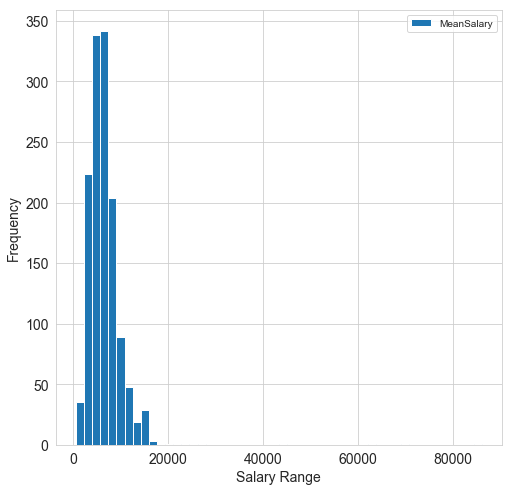

In [23]:
#plot a histogram of the salary distribution
ax = data_jobs['MeanSalary'].plot.hist(figsize=(8,8),fontsize=14,bins = 50)
plt.xlabel('Salary Range', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.show()

#there are quite a number of outliers. Majority of listings are less than $20,000 monthly
# maximum monthly salary for one of the job listings is $86,000

In [24]:
data_jobs[data_jobs.MeanSalary ==  86000]

,Applications,Categories,Company,EmployType,Location,Requirements,Seniority,Title,ExpiryDay,ExpiryMth,PostedDay,PostedMth,MeanSalary
161,13.0,"Information Technology, Professional Services",EXIGER SINGAPORE PTE. LTD.,"Permanent, Full Time",Central,Professional Experience Required\r\nA degree i...,Professional,Senior Data Scientist,03,Mar,01,Feb,86000.0


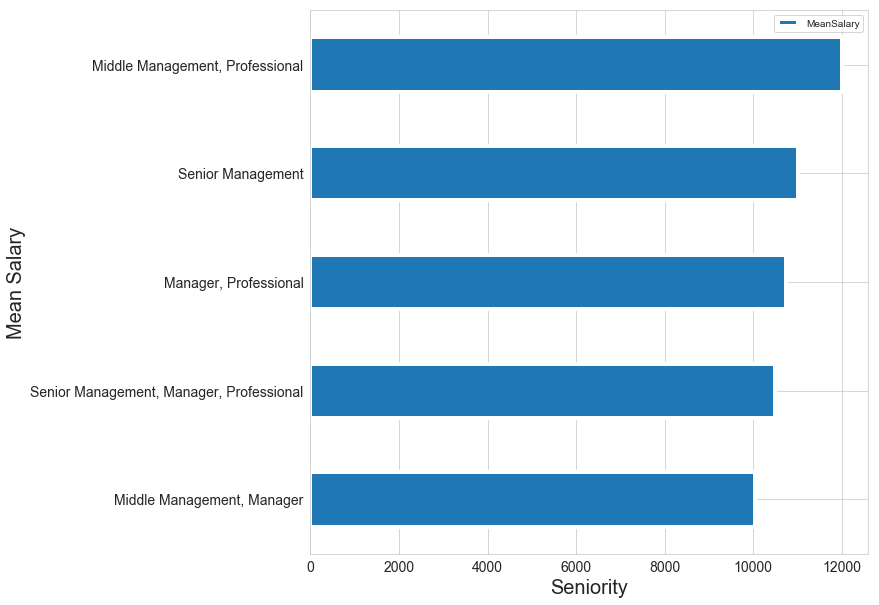

In [25]:
ax = data_jobs.groupby('Seniority')[['MeanSalary']].mean().sort_values('MeanSalary',ascending=True).tail(5).plot(kind = 'barh',figsize=(10,10),fontsize=14, linewidth=4)
plt.xlabel('Seniority', fontsize=20)
plt.ylabel('Mean Salary', fontsize=20)
plt.legend()
plt.show()

In [26]:
#let's remove the outliers where mean salary is greater than $20,000 monthly

data_jobs = data_jobs[data_jobs.MeanSalary <= 20000]

data_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 1 to 4397
Data columns (total 13 columns):
Applications    1332 non-null float64
Categories      1332 non-null object
Company         1332 non-null object
EmployType      1332 non-null object
Location        1332 non-null object
Requirements    1332 non-null object
Seniority       1332 non-null object
Title           1332 non-null object
ExpiryDay       1332 non-null object
ExpiryMth       1332 non-null object
PostedDay       1332 non-null object
PostedMth       1332 non-null object
MeanSalary      1332 non-null float64
dtypes: float64(2), object(11)
memory usage: 145.7+ KB


In [27]:
#reset the dataframe index

data_jobs.reset_index(drop = True, inplace=True)

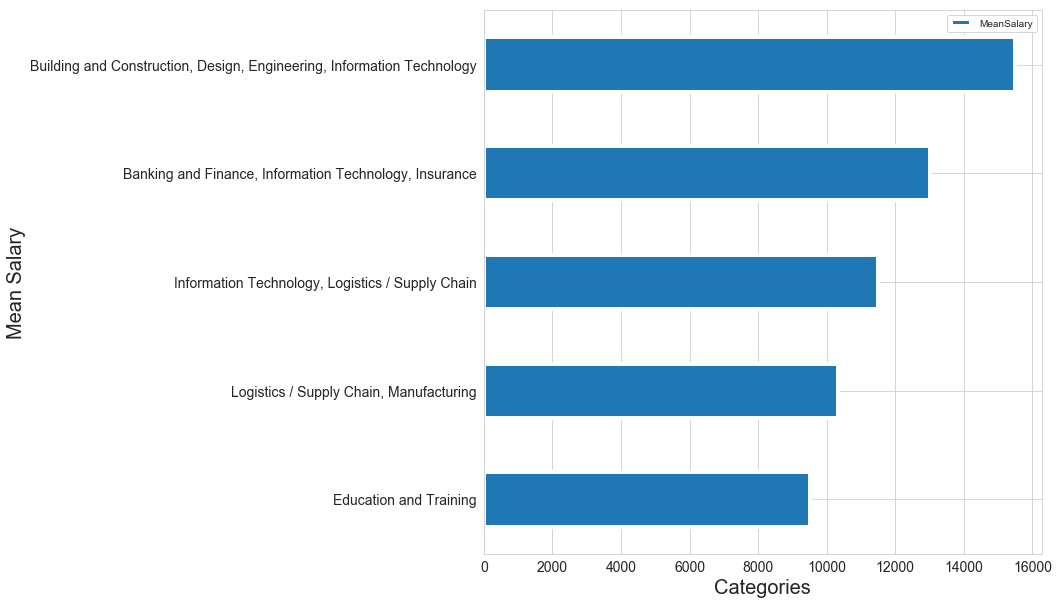

In [28]:
ax = data_jobs.groupby('Categories')[['MeanSalary']].mean().sort_values('MeanSalary', ascending=True).tail(5).plot(kind = 'barh',figsize=(10,10),fontsize=14, linewidth=4)
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Mean Salary', fontsize=20)
plt.legend()
plt.show()

In [29]:
#write function that will create dummy variables when the field has multiple options/categories

def create_dummy(colname,df):
    
    all_cat = set()
    #this is a set containing all the possible categories and we will feature engineer the corresponding number of columns

    cat_list = df[colname].str.replace(' / ', ', ').str.replace(' , ',', ').str.split(', ')
    print(len(cat_list))
    
    for category in cat_list:
        #create a column
        for i in category:
            all_cat.add(i)
        
            
    #cat_dummies = pd.DataFrame()
    
    #create a list of dictionaries, to be converted to dataframe later on
    cat_dummies = []
    
    #for each category that is listed for that row
    for category in cat_list:
        row = {}
        for cat in all_cat:#for all possible categories
            #print(i)
            if cat in category:
                row[cat] = 1 #this job listing has listed this employment type
            else:
                row[cat] = 0 #this job listing did not list this employment type
                    
        cat_dummies.append(row)        
    
    dummy_df = pd.DataFrame(cat_dummies)#convert list of dictionaries to dataframe
    
    #drop one column as reference category
    dummy_df = dummy_df.iloc[:,0:-1]
    
    return dummy_df, all_cat
                
            


In [30]:

#create dummy variables based on employment type
dummy_df, all_types = create_dummy("EmployType",data_jobs)

#merge the dummy variables with the original dataframe
data_jobs = pd.concat([data_jobs, dummy_df], axis=1)

#drop the original column

data_jobs.drop(['EmployType'],axis=1,inplace=True)



1332


In [31]:
#create dummy variables based on job category

cat_df, all_cats = create_dummy("Categories",data_jobs)

#merge the dummy variables with the original dataframe
data_jobs = pd.concat([data_jobs,cat_df], axis=1)


1332


In [32]:
#drop Categories columns

data_jobs.drop(['Categories'],axis=1,inplace=True)

In [33]:
#examine the Seniority column

data_jobs['Seniority'].value_counts()

Professional                                                                     316
Executive                                                                        284
Senior Executive                                                                 179
Non-executive                                                                     95
Junior Executive                                                                  90
Manager                                                                           87
Senior Management                                                                 49
Middle Management                                                                 32
Fresh/entry level                                                                 29
Executive, Senior Executive                                                       20
Professional, Senior Executive                                                    13
Professional, Executive                                          

In [34]:
#create dummy variables for seniority level

senior_df, all_levels = create_dummy("Seniority",data_jobs)

#merge the dummy variables with the original dataframe
data_jobs = pd.concat([data_jobs,senior_df], axis=1)

#drop Seniority column

data_jobs.drop(['Seniority'],axis=1,inplace=True)

1332


In [35]:
#create dummy variables for location

loc_df, all_locs = create_dummy("Location",data_jobs)

#merge the dummy variables with the original dataframe
data_jobs = pd.concat([data_jobs,loc_df], axis=1)

#drop Seniority
#drop Company column as it's not likely to be useful
#drop 'None' in location category as reference category

data_jobs.drop(['Location','Company'],axis=1,inplace=True)

data_jobs.head(10)

1332


,Applications,Requirements,Title,ExpiryDay,ExpiryMth,PostedDay,PostedMth,MeanSalary,Contract,Flexi work,...,Manager,Middle Management,Non-executive,Professional,Senior Executive,Central,East,Islandwide,North,South
0,4.0,Skills and Qualifications\r\nPossess a Bachelo...,APAC Data Engineer,06,Mar,04,Feb,7183.5,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.0,At least 7 years design and development experi...,Solution Architect (Data),06,Mar,04,Feb,9250.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,PhD/Master’s /Bachelors degree in Computer Sci...,Data Scientist,06,Mar,04,Feb,6500.0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.0,Requirements\r\n2+ years relevant industry exp...,Data Scientist,06,Mar,04,Feb,4250.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,- At least 3 years of relevant experience ...,Data Cente Facilities Manager,06,Mar,04,Feb,6500.0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,0.0,Strong written and oral communication skills r...,Financial Data Integration Intern,06,Mar,04,Feb,1000.0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1.0,• University degree in Computer Science/Math/S...,IT Data Analyst,06,Mar,04,Feb,6300.0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,0.0,Your expertise :\r\nYou have:\r\n– Proven expe...,KYC Client Onboarding Analyst,06,Mar,04,Feb,4375.0,0,0,...,0,0,0,1,0,1,0,0,0,0
8,0.0,Smallworld Applications development for layere...,Product Support Engineer,06,Mar,04,Feb,6750.0,0,0,...,0,0,0,1,0,1,0,0,0,0
9,8.0,Your profile\r\nYou are a passionate software ...,Software Engineer,06,Mar,04,Feb,9000.0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [36]:
data_jobs['ExpiryMth'].value_counts()

Feb    1065
Mar     267
Name: ExpiryMth, dtype: int64

In [37]:
data_jobs['PostedMth'].value_counts()

Jan    1221
Feb     111
Name: PostedMth, dtype: int64

In [38]:
#create dummy variables for posted month and expiry month
cols = ['ExpiryMth','PostedMth']

data_jobs_clean= pd.get_dummies(data_jobs,columns=cols,drop_first=True)


data_jobs_clean.head(10)

,Applications,Requirements,Title,ExpiryDay,PostedDay,MeanSalary,Contract,Flexi work,Freelance,Full Time,...,Non-executive,Professional,Senior Executive,Central,East,Islandwide,North,South,ExpiryMth_Mar,PostedMth_Jan
0,4.0,Skills and Qualifications\r\nPossess a Bachelo...,APAC Data Engineer,06,04,7183.5,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,0.0,At least 7 years design and development experi...,Solution Architect (Data),06,04,9250.0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0.0,PhD/Master’s /Bachelors degree in Computer Sci...,Data Scientist,06,04,6500.0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0.0,Requirements\r\n2+ years relevant industry exp...,Data Scientist,06,04,4250.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.0,- At least 3 years of relevant experience ...,Data Cente Facilities Manager,06,04,6500.0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5,0.0,Strong written and oral communication skills r...,Financial Data Integration Intern,06,04,1000.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,1.0,• University degree in Computer Science/Math/S...,IT Data Analyst,06,04,6300.0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
7,0.0,Your expertise :\r\nYou have:\r\n– Proven expe...,KYC Client Onboarding Analyst,06,04,4375.0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
8,0.0,Smallworld Applications development for layere...,Product Support Engineer,06,04,6750.0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
9,8.0,Your profile\r\nYou are a passionate software ...,Software Engineer,06,04,9000.0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [39]:
#find median salary

median_salary = np.median(data_jobs['MeanSalary'])

print("The median salary is ", median_salary)

The median salary is  6000.0


In [40]:
data_jobs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 76 columns):
Applications                  1332 non-null float64
Requirements                  1332 non-null object
Title                         1332 non-null object
ExpiryDay                     1332 non-null object
PostedDay                     1332 non-null object
MeanSalary                    1332 non-null float64
Contract                      1332 non-null int64
Flexi work                    1332 non-null int64
Freelance                     1332 non-null int64
Full Time                     1332 non-null int64
Internship                    1332 non-null int64
Part Time                     1332 non-null int64
Permanent                     1332 non-null int64
Accounting                    1332 non-null int64
Admin                         1332 non-null int64
Advertising                   1332 non-null int64
Architecture                  1332 non-null int64
Auditing                      1332 

<b> Performing NLP on Job Requirements and Job Title Text field <b>

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.model_selection import cross_val_score

#use count vectorizer on 'Requirements' field
# Lets use the stop_words argument to remove words like "and, the, a"
# include 1-grams and 2-grams
# eliminate words that appear in more than 90% of the documents and less than 5% of the documents
cvec = CountVectorizer(stop_words='english',ngram_range=(1,2),max_df = 0.9, min_df = 0.05)

# Fitting the vectorizer on our training data
cvec.fit(data_jobs_clean['Requirements'])

# Transforming our column to a document-term matrix
# And converting the result to a DataFrame.
dtm = pd.DataFrame(cvec.transform(data_jobs_clean['Requirements']).todense(),
                       columns=cvec.get_feature_names())

dtm.shape

(1332, 329)

In [42]:
# Which words appear the most?
word_counts = dtm.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

experience       3590
data             2017
skills           1786
knowledge        1363
strong           1085
work             1052
ability          1021
years             968
good              857
degree            783
working           761
management        756
engineering       728
communication     649
team              643
understanding     600
business          596
computer          588
science           573
tools             557
dtype: int64

In [43]:
# last 50 features
cvec.get_feature_names()[-50:]

['statistical',
 'statistics',
 'strong',
 'strong analytical',
 'strong communication',
 'support',
 'systems',
 'tableau',
 'team',
 'team player',
 'teams',
 'technical',
 'techniques',
 'technologies',
 'technology',
 'test',
 'testing',
 'thinking',
 'time',
 'tools',
 'track',
 'troubleshooting',
 'understand',
 'understanding',
 'use',
 'using',
 'various',
 'verbal',
 'verbal written',
 'visualization',
 'web',
 'willing',
 'willingness',
 'windows',
 'word',
 'work',
 'work experience',
 'work independently',
 'working',
 'working experience',
 'working knowledge',
 'writing',
 'written',
 'written communication',
 'written verbal',
 'year',
 'years',
 'years experience',
 'years relevant',
 'years working']

In [44]:
#include the document-term matrix as features in our model

#merge the dummy variables with the original dataframe
data_jobs_clean = pd.concat([data_jobs_clean,dtm], axis=1)

#drop the original 'Requirements' column

data_jobs_clean.drop(['Requirements'],axis=1,inplace=True)

data_jobs_clean.shape

#keep a copy of this cleaned data for question 2
data_jobs_q2 = copy.deepcopy(data_jobs_clean)



In [45]:
#now we create a document term matrix for the job title field

#use count vectorizer on 'Title' field
# Lets use the stop_words argument to remove words like "and, the, a"
# include 1-grams and 2-grams
# eliminate words that appear in more than 90% of the documents and less than 5% of the documents
cvec2 = CountVectorizer(stop_words='english',ngram_range=(1,2),max_df = 0.9, min_df = 0.05)

# Fitting the vectorizer on our training data
cvec2.fit(data_jobs_clean['Title'])

# Transforming our column to a document-term matrix
# And converting the result to a DataFrame.
dtm2 = pd.DataFrame(cvec2.transform(data_jobs_clean['Title']).todense(),
                       columns=cvec2.get_feature_names())

dtm2

,analyst,business,business analyst,data,data scientist,engineer,manager,operations,scientist,senior,software,software engineer,technology
0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,1,0,0,0,0
3,0,0,0,1,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,1,1,0


In [46]:
# Which words appear the most?
word_counts = dtm2.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

engineer             647
data                 398
analyst              318
senior               268
software             117
scientist            116
technology           112
business             100
software engineer     97
data scientist        83
operations            81
business analyst      74
manager               72
dtype: int64

In [47]:
# last 50 features
cvec2.get_feature_names()[-50:]

['analyst',
 'business',
 'business analyst',
 'data',
 'data scientist',
 'engineer',
 'manager',
 'operations',
 'scientist',
 'senior',
 'software',
 'software engineer',
 'technology']

In [48]:
#include the document-term matrix as features in our model

#merge the dummy variables with the original dataframe
data_jobs_clean = pd.concat([data_jobs_clean,dtm2], axis=1)

#drop the original 'Requirements' column

data_jobs_clean.drop(['Title'],axis=1,inplace=True)

data_jobs_clean.shape


(1332, 416)

In [49]:
#if above or equal median salary, classified as high salary (1), else classified as low salary (0)
data_jobs_clean['SalaryClass'] = np.where(data_jobs_clean['MeanSalary']>=6000, 1, 0)

#drop the original Salary column as we are supposed to classify whether a job offers a high or low salary
#based on features like the location, title, and summary of the job
data_jobs_clean.drop(['MeanSalary'],axis=1,inplace=True)


data_jobs_clean.dtypes

Applications                 float64
ExpiryDay                     object
PostedDay                     object
Contract                       int64
Flexi work                     int64
Freelance                      int64
Full Time                      int64
Internship                     int64
Part Time                      int64
Permanent                      int64
Accounting                     int64
Admin                          int64
Advertising                    int64
Architecture                   int64
Auditing                       int64
Banking and Finance            int64
Building and Construction      int64
Consulting                     int64
Customer Service               int64
Design                         int64
Education and Training         int64
Engineering                    int64
Environment                    int64
General Management             int64
General Work                   int64
Health                         int64
Healthcare                     int64
H

In [50]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

### 1) We first examine the factors that impact Salary.


In [51]:
#building a classifier to classify a job as high salary (above or equal median) or low salary (below median)

#target variable is the salary class (high or low)
y = data_jobs_clean['SalaryClass'].values

X = data_jobs_clean.iloc[:,0:-1]

#split into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

X

,Applications,ExpiryDay,PostedDay,Contract,Flexi work,Freelance,Full Time,Internship,Part Time,Permanent,...,data,data scientist,engineer,manager,operations,scientist,senior,software,software engineer,technology
0,4.0,06,04,0,0,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,0.0,06,04,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,06,04,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
3,0.0,06,04,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
4,0.0,06,04,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,0.0,06,04,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1.0,06,04,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0.0,06,04,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,06,04,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9,8.0,06,04,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [52]:
#Create a Random Forest Classifier (ensemble model)
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [53]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7865168539325843


In [54]:
#what about the 10-fold cross-validated score?
print (np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

0.788676469627801


In [55]:
#calculate AUC score

y_score_tmp = clf.predict_proba(X_test)
y_score = pd.Series([x[1] for x in y_score_tmp])

print("AUC Score:",metrics.roc_auc_score(y_test, y_score))

AUC Score: 0.8538832199546484


In [56]:
#print out feature importances to see which are the best predictors for salary classification

for name, importance in zip(X_train.columns, clf.feature_importances_):  
    print(name, "=", importance)

Applications = 0.02121571094500474
ExpiryDay = 0.015063405773805511
PostedDay = 0.012895038811777185
Contract = 0.0029037182459549834
Flexi work = 3.383129400357395e-05
Freelance = 0.00010500925881659333
Full Time = 0.002668749177247556
Internship = 0.00032803463845060965
Part Time = 2.8466802095584302e-05
Permanent = 0.002014050778077617
Accounting = 0.0003571818820239627
Admin = 0.00024594091052966663
Advertising = 0.0004680041873818909
Architecture = 9.416111670085956e-05
Auditing = 0.0007185111374100704
Banking and Finance = 0.003164417368208377
Building and Construction = 0.0005175840118959184
Consulting = 0.001949684758288236
Customer Service = 0.00010514883292109714
Design = 3.654592723609627e-05
Education and Training = 0.00025761597640147236
Engineering = 0.007974513868512764
Environment = 0.0001344291270605391
General Management = 0.00022581244941169396
General Work = 3.5304301363801155e-05
Health = 2.7960583890503025e-05
Healthcare = 0.00027968232093004535
Hospitality = 0.00

mechanical = 0.001929830778931411
meet = 0.0008731562127392901
methodologies = 0.0006980197293864165
microsoft = 0.0026602818683223654
minimum = 0.003469926207463989
minimum years = 0.0027443357614688317
modeling = 0.0008374614098080038
models = 0.003199074733495312
motivated = 0.001361653054070762
ms = 0.003013125868371467
multi = 0.001335545223514492
multiple = 0.0013439281915556527
network = 0.0017338797839442973
new = 0.0014944985639397845
nosql = 0.002739997836715807
notified = 0.0008334383404879185
office = 0.0026731838469314924
open = 0.001498498975037186
operational = 0.0011995855134101137
operations = 0.002021398662773462
oracle = 0.0016661195557788264
oral = 0.0017678970438118444
organization = 0.0011349068934250186
organizational = 0.0014804131392762167
oriented = 0.0012144433340600955
passion = 0.0012743866202162993
patterns = 0.0015436659329250443
people = 0.0011093096784595639
performance = 0.002577393918909813
personal = 0.0010999476603501394
phd = 0.004466960952298208
p

In [57]:
#print the top 10 most important features
feature_importance = pd.DataFrame()

feature_importance['Feature name'] = X_train.columns

feature_importance['Importance'] = clf.feature_importances_

feature_importance.sort_values('Importance',ascending=False).head(10)


,Feature name,Importance
146,diploma,0.024947
168,experience,0.024805
58,Executive,0.023871
0,Applications,0.021216
60,Junior Executive,0.020121
1,ExpiryDay,0.015063
375,understanding,0.013931
131,data,0.013471
2,PostedDay,0.012895
64,Professional,0.010669


### 2) Next, we examine question 2, factors that distinguish data scientist jobs from other jobs </b>

In [58]:
data_jobs_q2['Title'].value_counts()

Data Scientist                                                                                     45
Business Analyst                                                                                   33
Data Engineer                                                                                      29
Software Engineer                                                                                  29
Data Analyst                                                                                       16
Accounts  Officer (3-6 months contract, Science Park, $2500-2800)                                  13
Senior Software Engineer                                                                           12
Engineering Assistant-QA (S$1800-2000+OT, Day Shift, West)                                          7
DevOps Engineer                                                                                     6
Lead Data Scientist                                                               

In [59]:
#create a new feature that indicates if it is a data science job or not

data_jobs_q2['DataScienceClass'] = np.where(data_jobs_q2['Title'].str.contains('data|Data', regex=True), 1, 0)

In [60]:
data_jobs_q2['DataScienceClass'].value_counts()

0    911
1    421
Name: DataScienceClass, dtype: int64

In [61]:
#drop the Title column

data_jobs_q2.drop(['Title'],axis=1,inplace=True)

In [63]:
#for this, we'll build a logistic regression model
#try a few features out first

import statsmodels.formula.api as sm


cat_model = sm.logit("DataScienceClass ~ data + hadoop + MeanSalary + sql + hive+  python + analytics + Applications + diploma ", data=data_jobs_q2).fit()
cat_model.summary()

Optimization terminated successfully.
         Current function value: 0.444905
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       DataScienceClass   No. Observations:                 1332
Model:                          Logit   Df Residuals:                     1322
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Feb 2019   Pseudo R-squ.:                  0.2869
Time:                        03:50:27   Log-Likelihood:                -592.61
converged:                       True   LL-Null:                       -830.99
                                        LLR p-value:                 5.424e-97
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.9146      0.212     -9.044      0.000      -2.329      -1.500
data             0.4882      0.048     10.175      0.000       0.394       0.582
hadoop           0.5868      0.215      2.728      0.006       0.165       1.008
MeanSalary   -2.805e-05   2.85e-05     -0.984      0.325   -8.39e-05    2.78e-05
sql              0.4022      0.117      3.432      0.001       0.172       0.632
hive             1.3288      0.401      3.313      0.001       0.543       2.115
python           0.4569      0.143      3.205      0.001       0.177       0.736
analytics        0.4173      0.168      2.486      0.013       0.088       0.746
Applications     0.0151      0.008      1.883      0.060      -0.001       0.031
diploma          0.0501      0.213      0.235      0.814      -0.368       0.468
================================================================================
"""

In [64]:
# exponentiate the coefficients to get the odds ratio:
np.exp(cat_model.params)

Intercept       0.147408
data            1.629310
hadoop          1.798241
MeanSalary      0.999972
sql             1.495105
hive            3.776500
python          1.579118
analytics       1.517824
Applications    1.015263
diploma         1.051393
dtype: float64

In [65]:
# We've got all significant effects on our predictors here.
# Must interpret them as odds ratios.
# 1. for a 1 word increase of 'hadoop', there is a ~2.55x increase in the odds of the category being data science
# 2. for a 1 word increase of 'data', there is a ~1.65x increase in the odds of the category being data science
# 3. for a 1 word increase of 'python', there is a ~1.59x increase in the odds of evergreen


In [62]:
#building a classifier to classify a job as a data scientist job or a non-data science job

#target variable
y = data_jobs_q2['DataScienceClass'].values

X = data_jobs_q2.iloc[:,0:-1]

#split into training and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test


In [66]:
#We can attempt Random Forest Classifier again to see what results we get
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [67]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8239700374531835


In [68]:
#what about the 10-fold cross-validated score
print (np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

0.8553407898161909


In [69]:
#calculate AUC score

y_score_tmp = clf.predict_proba(X_test)
y_score = pd.Series([x[1] for x in y_score_tmp])

print("AUC Score:",metrics.roc_auc_score(y_test, y_score))

AUC Score: 0.9150310559006212


In [70]:
#print the top 10 most important features in predicting if a job belongs to the data scientist category
feature_importance = pd.DataFrame()

feature_importance['Feature name'] = X_train.columns

feature_importance['Importance'] = clf.feature_importances_

feature_importance.sort_values('Importance',ascending=False).head(10)


,Feature name,Importance
132,data,0.087570
348,spark,0.022956
193,hadoop,0.021036
3,MeanSalary,0.020166
349,sql,0.018453
170,experience data,0.018038
90,analytics,0.015559
0,Applications,0.015387
230,machine,0.015367
224,learning,0.014198


 
### What components of a job posting distinguish data scientists from other data jobs?

It appears that most of the information that accurately predict the job category can be found under the job requirements in terms of the skillset required e.g. spark, hadoop, hive and sql
    
A high mean salary is also a good predictor that a job belongs to the data science category.

### Executive Summary of Findings

A brief writeup in an executive summary, written for a non-technical audience.
Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

To predict if salary of a job posting would be high (above or equal to the median salary) or low (below median salary), I decided to try Random Forest Classfier approach first as it is versatile and robust for most applications.

It also requires less tuning in terms of data preparation as it is able to handle categorical variables and text fields and does not require variables to be normalised, whereas other methods do.

The findings indicate that Executives and Junior Executive positions predict a higher salary, as well as when data is mentioned in the job description. When certification e.g. diploma is listed in the job requirements, it seems to indicate a higher salary as well.

For the prediction of whether a job would belong the the 'Data Science' category or not, I decided to go with the Logistic Regression approach as the coefficients can be used to find odds ratio and interpret the logistic regression coefficients. Logistic regression is an efficient classification algorithm that shares similar properties to linear regression.
The coefficients in a logistic regression model are interpretable (although somewhat complex): they represent the change in log-odds due to the input variables. However, the downside of using Logistic Regression is that the data would need be centered, and categorical data fields need to be converted to dummy variables.

It appears that the distinguishing factor between data science jobs and non-data science jobs, as well as the information that accurately predict the job category can be found under the job requirements in terms of the skillset required e.g. spark, python, hadoop, hive and sql
    
A high mean salary is also a good predictor that a job belongs to the data science category.